# ARGENTINE GOVERNMENT DATA (OIL AND GAS)

CSV data set used in this notebook downloable at: https://bit.ly/3UwPbbG 

Data property of:
*Secretaría de Energía. Subsecretaría de Planeamiento Energético. Dirección Nacional de Escenarios y Evaluación de Proyectos. Dirección de Información Energética.Tecnología de la Información.*

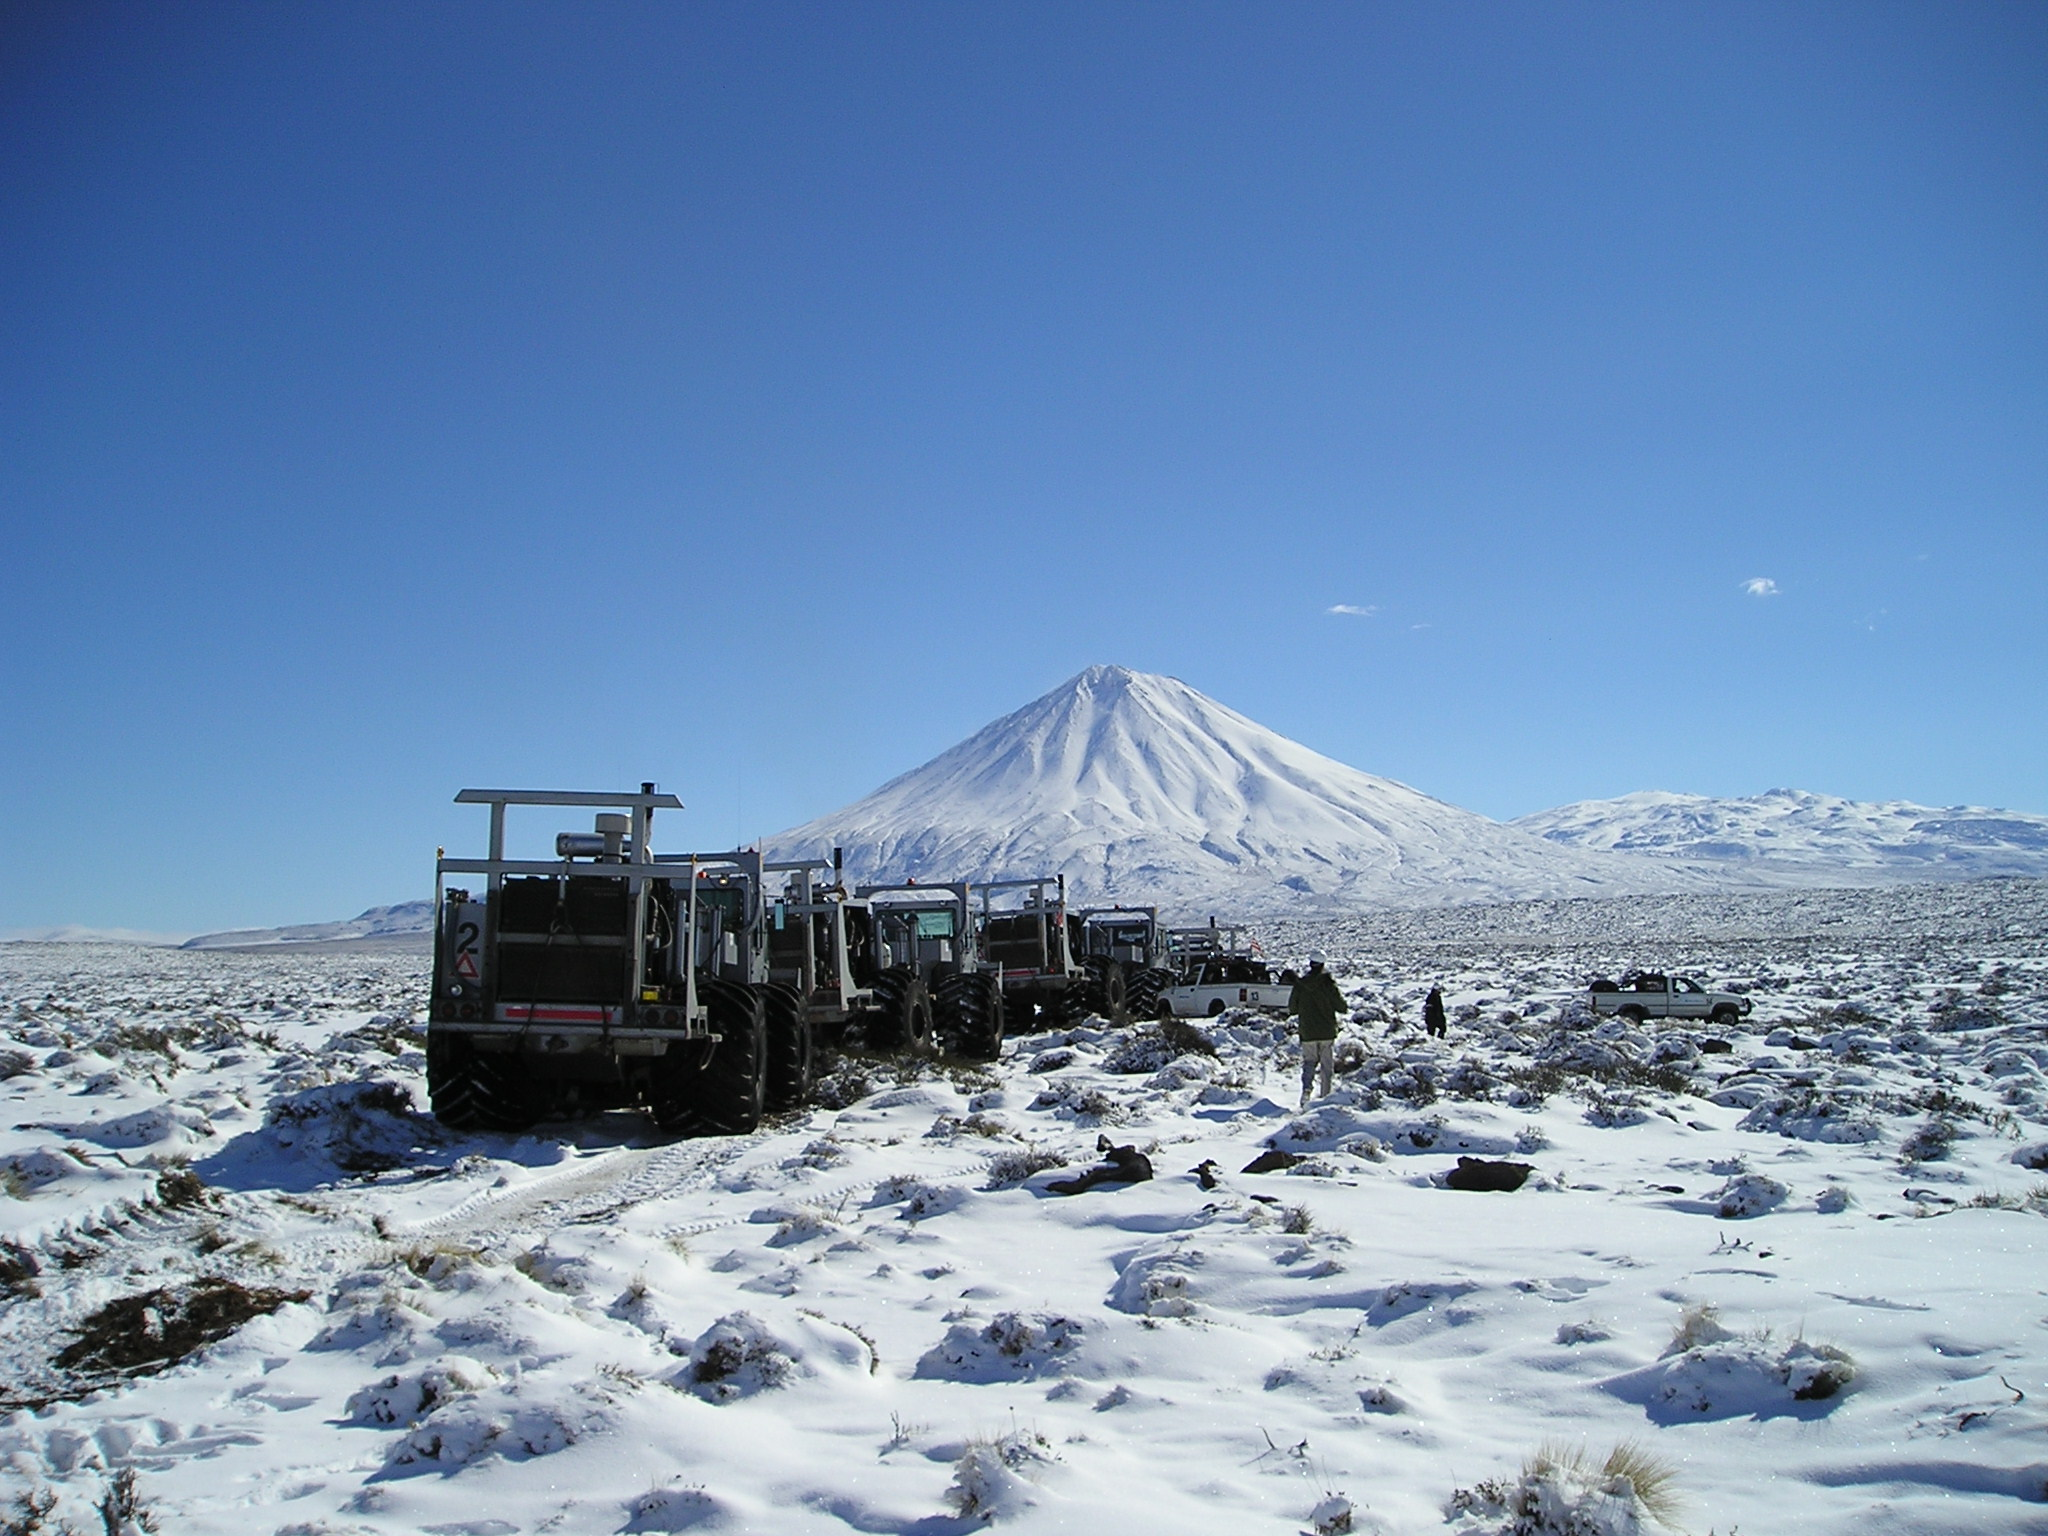

In [1]:
from IPython.display import Image
#Esta es la imagen satelital y el área de consesion (intentar con QGIS)
Image('img/P1010022.JPG', width=1200 , height=800)

# Neuquén: Working in the Oil Wells of Neuquén

We will focus on the province of Neuquén, where we have the most information. Afterward, we will select the oil field that has produced the most petroleum and analyze it.

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd
import urllib
import missingno as msno
from termcolor import colored

# Set stylistic options for plots generated later on
sns.set_context("paper")
plt.style.use('fivethirtyeight')

In [3]:
df=pd.read_csv('df_EDA.csv')

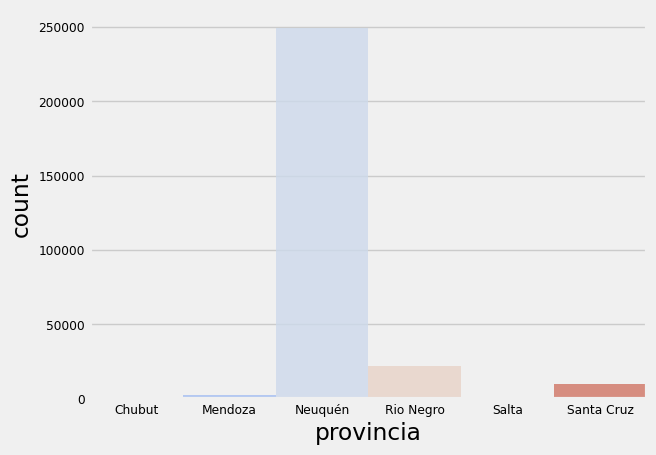

In [4]:
hist_df = df.groupby(['provincia']).size().reset_index(name='count')


# Plot a histogram
fig = sns.barplot(data = hist_df,
                  x = 'provincia',
                  y = 'count',
                  #hue = 'count',
                  width = 1,
                  palette = 'coolwarm',
                  alpha = 0.8
                 )

In this .shp file obtained from IGN, we have the entire map of Argentina plotted. However, we request that you extract only the province of Neuquén. Afterward, we will plot the wells without duplicates to create a user-friendly graph.

In [5]:
provincias = gpd.read_file('source/argentinashp/arg.shp')
provincias.head(5)

provincias['nam'] = provincias['nam'].astype(str)

# Seleccionar la geometría de la provincia de Neuquén
provincia_neu = provincias[provincias['nam'] == 'Neuquén']

#neuquen_gpd=gpd.GeoDataFrame(provincia_neu)

pozos_neuquen=df.query('provincia=="Neuquén"')
#print(pozos_neuquen)

#esto lo hago para plotear los pozos

pozos_sin_duplicados = pozos_neuquen.drop_duplicates(subset=['idpozo'])

pozos_sin_duplicados.describe()

,Unnamed: 0,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,profundidad,coordenadax,coordenaday,profundidad_filtered
count,3350.000000,3322.000000,3350.000000,3350.000000,3350.000000,3350.000000,3350.000000,3350.000000,3350.000000,3350.000000,3045.000000
mean,98686.093433,2020.275436,1.634925,155483.518806,649.759864,1109.326311,389.294592,3988.619218,-68.820827,-38.446871,3970.026328
std,98200.850878,2.675965,2.145256,13309.128048,1363.892835,2461.846645,813.712098,1584.320576,0.638114,0.617416,1332.276215
min,0.000000,2010.000000,1.000000,3640.000000,0.000000,0.000000,0.000000,0.000000,-69.903384,-69.415770,812.000000
25%,8904.500000,2018.000000,1.000000,153878.250000,0.000000,26.830000,1.905000,2973.000000,-69.151125,-38.701905,2996.000000
50%,18564.000000,2020.000000,1.000000,158896.500000,22.705000,188.635000,49.925000,3920.000000,-68.830925,-38.382779,3846.000000
75%,197850.500000,2023.000000,1.000000,162563.750000,613.032500,745.569500,378.714375,5420.345000,-68.572344,-38.302920,5265.000000
max,283768.000000,2023.000000,12.000000,164937.000000,12977.180000,27913.100000,10596.412000,7784.000000,-38.590070,-37.216100,6193.000000


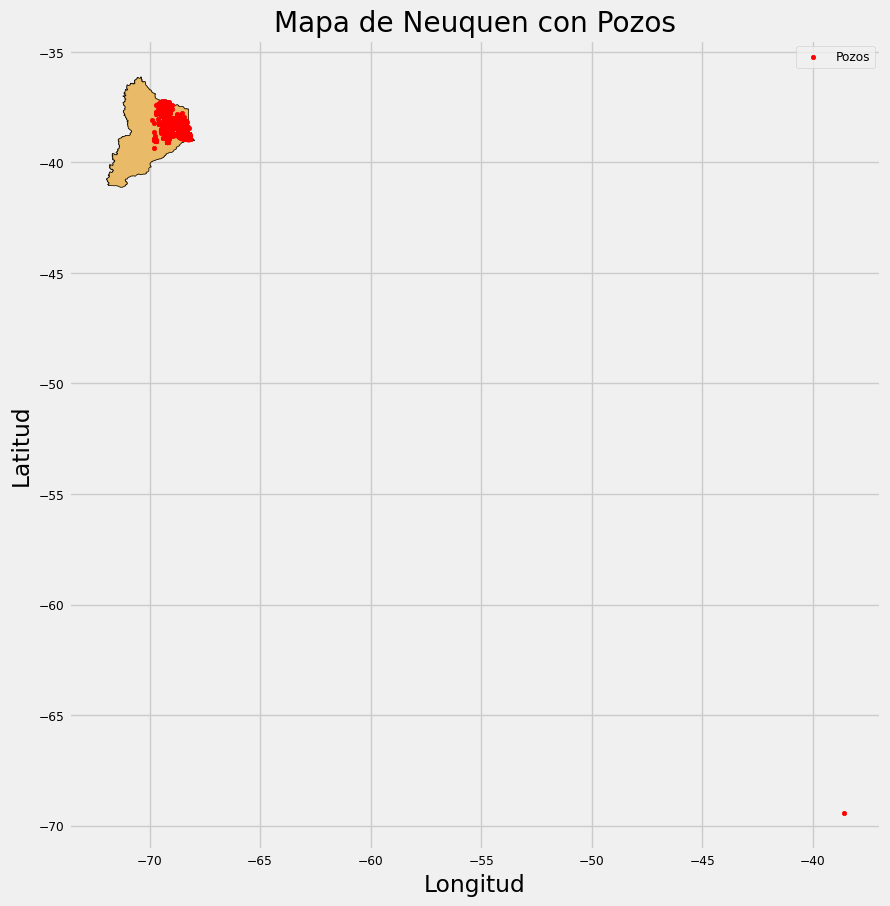

In [6]:
# Convertir las coordenadas de los pozos a un GeoDataFrame
gdf_pozos = gpd.GeoDataFrame(pozos_sin_duplicados, geometry=gpd.points_from_xy(pozos_sin_duplicados['coordenadax'],pozos_sin_duplicados['coordenaday']))


# Graficar el mapa de la provincia de Neuquén
fig, ax = plt.subplots(figsize=(10, 10))
provincia_neu.plot(ax=ax, color='lightgray', edgecolor='black')  # Mapa de provincias
provincia_neu.plot(ax=ax, color='orange', edgecolor='black', alpha=0.5)  # Mapa de Neuquén
gdf_pozos.plot(ax=ax, color='red', markersize=10, label='Pozos')  # Puntos de pozos

ax.set_title('Mapa de la Provincia de Neuquén con Pozos')


# Etiquetar los pozos con sus IDs
#for idx, row in gdf_pozos.iterrows():
 #   ax.text(row['geometry'].x, row['geometry'].y, str(row['idpozo']), fontsize=8, ha='center')
    
    
    # Personalizar el mapa
ax.set_title('Mapa de Neuquen con Pozos')
ax.legend()
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)

In [7]:
#produccion de pozos segun zonas

# Crear un diccionario para almacenar DataFrames separados por área de producción
pozos_por_area = {}

# Iterar sobre cada área de producción y crear un DataFrame separado para cada una
for area, datos_area in pozos_neuquen.groupby('idareayacimiento'):
    pozos_por_area[area] = datos_area.copy()

    

#print(pozos_por_area)

pozos_por_area.keys()

dict_keys(['ACO', 'ACY', 'ADAF', 'ADCO', 'AGA', 'AGCA', 'AGFD', 'AGP', 'ALL', 'AMOR', 'ANC', 'ANCS', 'APEM', 'APO', 'APVM', 'AVI', 'BADC', 'BAEO', 'BAP', 'BDCC', 'BDNN', 'BDSS', 'BDTO', 'BGO', 'BGU', 'BMT', 'BPE', 'BPO', 'BTN', 'CAO', 'CASO', 'CASU', 'CAVI', 'CDLO', 'CEN', 'CLMI', 'CLNI', 'CNES', 'CPAR', 'CRD', 'CSN', 'CSUR', 'CURA', 'DAD', 'ECL', 'ECOO', 'ELOR', 'ELSA', 'ETE', 'ETRI', 'FIM', 'FOR', 'GUA', 'LAC', 'LAEC', 'LAOC', 'LAOR', 'LCA', 'LCAM', 'LCLL', 'LCNC', 'LCOL', 'LDL', 'LINV', 'LJE', 'LMAN', 'LMOL', 'LOAM', 'LOAN', 'LOAS', 'LR', 'LRAN', 'LRII', 'LTAC', 'MGR', 'MMN', 'MMO', 'NIL', 'PDYI', 'PMYI', 'PNET', 'PNOE', 'PPNC', 'PSI', 'PSN', 'PSNC', 'PSY2', 'PTC2', 'PUEP', 'PVRA', 'RDA', 'RDM', 'RIPI', 'RLCZ', 'RNQ', 'RQC', 'SIBL', 'SICH', 'SRO', 'SRVM', 'TRA', 'TTRL', 'Y065', 'Y310', 'Y325', 'Z011', 'Z050', 'Z051', 'Z059', 'Z077', 'Z115', 'Z116', 'Z259', 'Z262', 'Z349', 'Z350'])

ACO: 426.418143 m3 de petroleo
ACY: 20877.77465 m3 de petroleo
ADAF: 12352.012 m3 de petroleo
ADCO: 357458.74922 m3 de petroleo
AGA: 110090.32 m3 de petroleo
AGCA: 0.0 m3 de petroleo
AGFD: 590050.591389 m3 de petroleo
AGP: 5147.0412830000005 m3 de petroleo
ALL: 206782.95 m3 de petroleo
AMOR: 103213.31601000001 m3 de petroleo
ANC: 4.6000000000000005 m3 de petroleo
ANCS: 8.580000000000002 m3 de petroleo
APEM: 82296.07746100001 m3 de petroleo
APO: 0.0 m3 de petroleo
APVM: 40734.957994 m3 de petroleo
AVI: 0.0 m3 de petroleo
BADC: 1428280.73 m3 de petroleo
BAEO: 367913.80369525 m3 de petroleo
BAP: 61436.190532 m3 de petroleo
BDCC: 652350.059089 m3 de petroleo
BDNN: 61289.955 m3 de petroleo
BDSS: 5496227.71 m3 de petroleo
BDTO: 0.0 m3 de petroleo
BGO: 30351.259000000005 m3 de petroleo
BGU: 161.0 m3 de petroleo
BMT: 7844.420018999999 m3 de petroleo
BPE: 355783.816205 m3 de petroleo
BPO: 3877649.497305 m3 de petroleo
BTN: 288442.6 m3 de petroleo
CAO: 45964.28 m3 de petroleo
CASO: 917408.013574

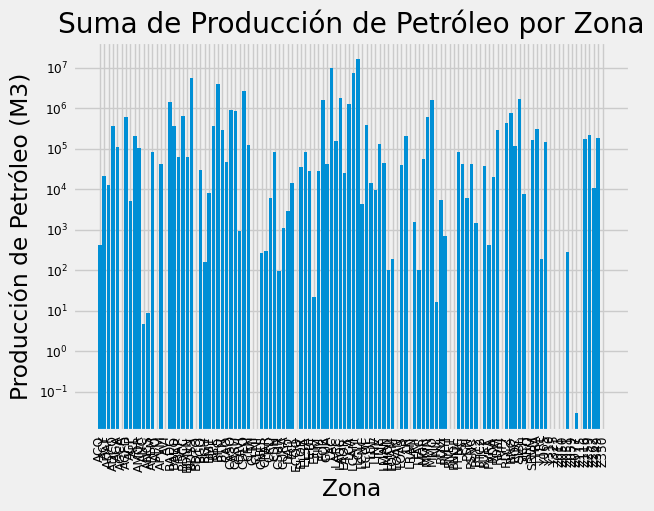

In [8]:
# Inicializar un diccionario para almacenar las sumas de producción de petróleo por zona
produccion_petroleo_por_zona = {}



for nombre_zona, dataframe in pozos_por_area.items():
    # Calcular la suma de producción de petróleo por zona
    suma_prod_pet = dataframe['prod_pet'].sum()
    
    # Almacenar la suma en el diccionario
    produccion_petroleo_por_zona[nombre_zona] = suma_prod_pet

# Mostrar las sumas de producción de petróleo por zona
for nombre_zona, suma_prod_pet in produccion_petroleo_por_zona.items():
    print(f"{nombre_zona}: {suma_prod_pet} m3 de petroleo")


# También puedes plotear las sumas de producción por zona, si es necesario
plt.bar(produccion_petroleo_por_zona.keys(), produccion_petroleo_por_zona.values())
plt.yscale('log')
plt.title('Suma de Producción de Petróleo por Zona')
plt.xlabel('Zona')
plt.xticks(rotation=90)
plt.ylabel('Producción de Petróleo (M3)')
plt.show()


ADCO: 357458.74922 barriles de petróleo
AGA: 110090.32 barriles de petróleo
AGFD: 590050.591389 barriles de petróleo
ALL: 206782.95 barriles de petróleo
AMOR: 103213.31601000001 barriles de petróleo
BADC: 1428280.73 barriles de petróleo
BAEO: 367913.80369525 barriles de petróleo
BDCC: 652350.059089 barriles de petróleo
BDSS: 5496227.71 barriles de petróleo
BPE: 355783.816205 barriles de petróleo
BPO: 3877649.497305 barriles de petróleo
BTN: 288442.6 barriles de petróleo
CASO: 917408.0135746668 barriles de petróleo
CASU: 839094.3772159999 barriles de petróleo
CDLO: 2655256.2514039194 barriles de petróleo
CEN: 124472.240001837 barriles de petróleo
FOR: 1585117.487044 barriles de petróleo
LAC: 9842837.350000001 barriles de petróleo
LAEC: 150497.24229999998 barriles de petróleo
LAOC: 1811007.727895 barriles de petróleo
LCA: 1281174.608 barriles de petróleo
LCAM: 7457371.680000001 barriles de petróleo
LCLL: 15859103.43 barriles de petróleo
LCOL: 379270.06 barriles de petróleo
LJE: 132681.65

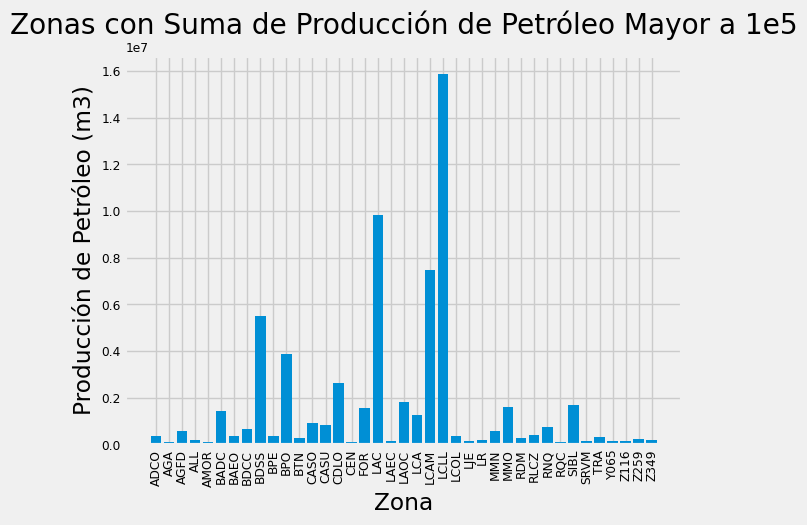

In [9]:
columnas_deseadas = ['idpozo', 'coordenadax', 'coordenaday', 'prod_pet', 'prod_gas']

# Supongamos que diccionario_zonas ya está creado
for codigo, dataframe in pozos_por_area.items():
    df_zona = dataframe[columnas_deseadas].copy()
    pozos_por_area[codigo] = df_zona
    


produccion_petroleo_por_zona = {}

for nombre_zona, dataframe in pozos_por_area.items():
    # Calcular la suma de producción de petróleo por zona
    suma_prod_pet = dataframe['prod_pet'].sum()
    
    # Almacenar la suma en el diccionario
    produccion_petroleo_por_zona[nombre_zona] = suma_prod_pet

# Filtrar las zonas con sumas mayores a 1e6
zonas_filtradas = {nombre_zona: suma_prod_pet for nombre_zona, suma_prod_pet in produccion_petroleo_por_zona.items() if suma_prod_pet > 1e5}

# Mostrar las zonas filtradas y sus sumas de producción de petróleo
for nombre_zona, suma_prod_pet in zonas_filtradas.items():
    print(f"{nombre_zona}: {suma_prod_pet} barriles de petróleo")

# También puedes plotear las zonas filtradas, si es necesario
plt.bar(zonas_filtradas.keys(), zonas_filtradas.values())
plt.title('Zonas con Suma de Producción de Petróleo Mayor a 1e5')
plt.xticks(rotation=90)
plt.xlabel('Zona')
plt.ylabel('Producción de Petróleo (m3)')
plt.show()


C:\Users\Felipe\AppData\Local\Temp\ipykernel_27828\1166675427.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab10', len(pozos_por_area_filtrado.keys()))


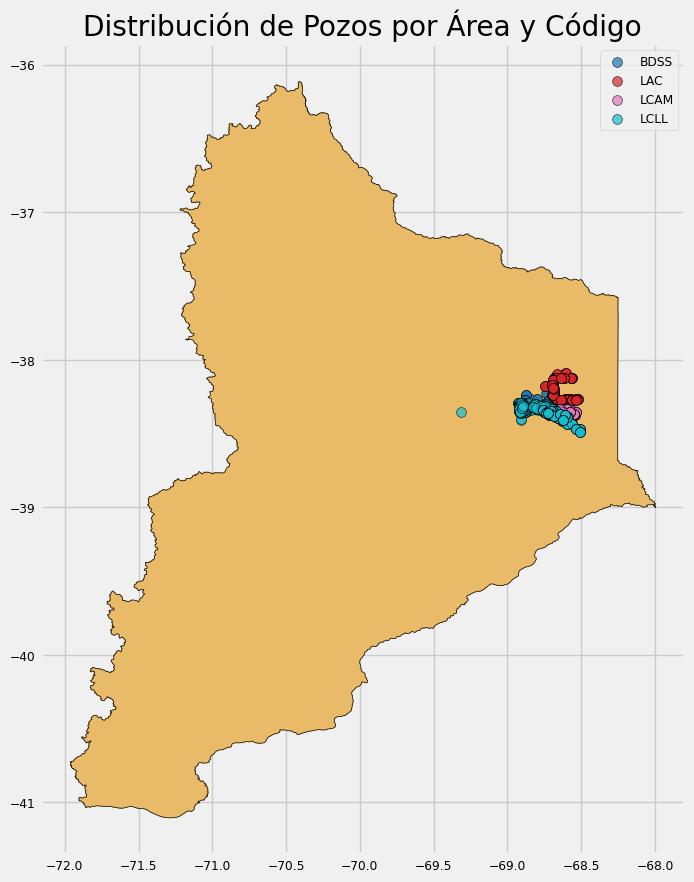

In [10]:
#me quedo con los 4 que mas producen y  grafico en el mapa

keys_deseadas = ["BDSS", "LAC", "LCAM", "LCLL"]

pozos_por_area_filtrado = {key: value for key, value in pozos_por_area.items() if key in keys_deseadas}
    
        # Graficar los GeoDataFrames en un mismo mapa
fig, ax = plt.subplots(figsize=(10, 10))

provincia_neu.plot(ax=ax, color='lightgray', edgecolor='black')  # Mapa de provincias
provincia_neu.plot(ax=ax, color='orange', edgecolor='black', alpha=0.5)  # Mapa de Neuquén
    
# Obtener colores únicos para cada dataframe
colores = plt.cm.get_cmap('tab10', len(pozos_por_area_filtrado.keys()))

# Plotear los pozos en el mapa con colores diferentes para cada dataframe

for i, (nombre_zona, dataframe) in enumerate(pozos_por_area_filtrado.items()):
    gdf = gpd.GeoDataFrame(dataframe, geometry=gpd.points_from_xy(dataframe['coordenadax'], dataframe['coordenaday']))
    gdf=gdf.drop_duplicates(subset='idpozo')
    color = colores.colors[i % len(colores.colors)]  # Ciclar colores si hay más dataframes que colores disponibles
    gdf.plot(ax=ax, color=color, markersize=50, alpha=0.7, edgecolor='black', label=nombre_zona)
    
# Personalizar el mapa
plt.title('Distribución de Pozos por Área y Código')
plt.legend()
plt.show()

# TRABAJO CON LOMA CAMPANA LL

In [11]:

LCLL = df[df['idareayacimiento'].str.contains("LCLL")]
LCLL.head()

,Unnamed: 0,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,tipoestado,tipopozo,...,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,fecha,profundidad_filtered
7726,7726,YPF,2015.0,1,152988,597.51,700.32,424.75,Extracción Efectiva,Petrolífero,...,-68.920559,-38.325151,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2015-01-31,2015-01-01,3035.0
7728,7728,YPF,2017.0,1,155222,86.62,47.61,17.35,Extracción Efectiva,Petrolífero,...,-68.889600,-38.302406,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2017-01-31,2017-01-01,3055.0
7740,7740,YPF,2017.0,1,154910,64.35,38.66,8.60,Extracción Efectiva,Petrolífero,...,-68.879165,-38.324472,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2017-01-31,2017-01-01,3125.0
7742,7742,YPF,2011.0,1,116022,45.38,311.47,310.48,Extracción Efectiva,Gasífero,...,-68.631085,-38.411343,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2011-01-31,2011-01-01,3150.0
7744,7744,YPF,2014.0,1,144941,315.43,325.40,399.17,Extracción Efectiva,Petrolífero,...,-68.874600,-38.347400,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2014-01-31,2014-01-01,2994.0


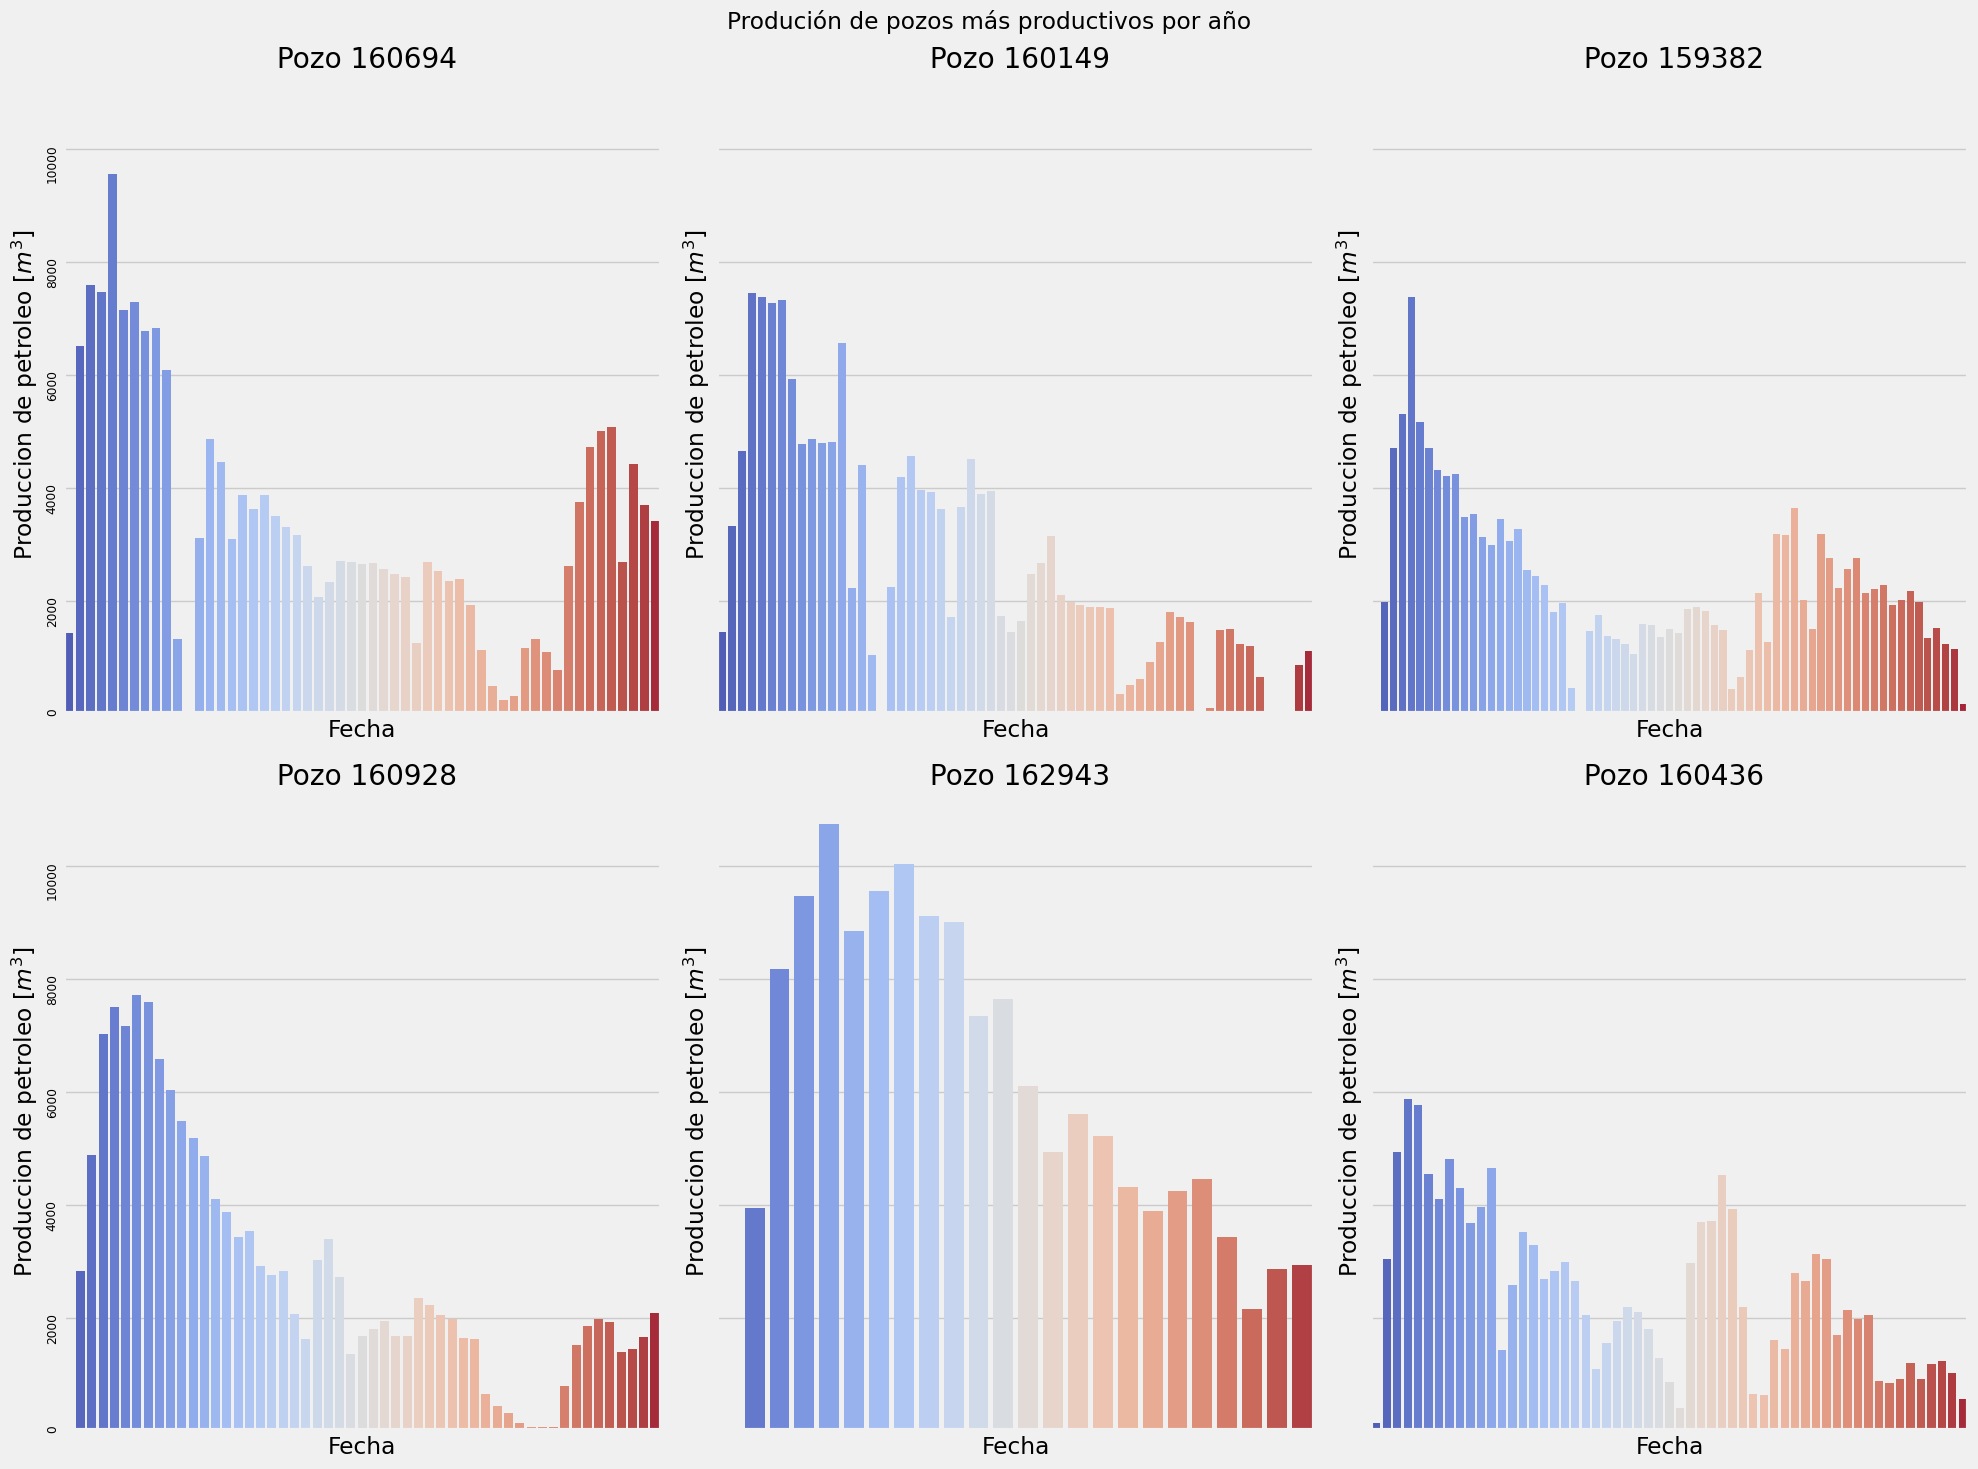

In [24]:
#Generate data frame to be used for graphs
LCLL_pozo=LCLL.groupby(["idpozo", "fecha"])["prod_pet"].sum().reset_index()
#LCLL_pozo=LCLL_pozo.astype({"anio": int})
num_rows=len(LCLL_pozo['idpozo'].unique())

#Find 6 most productive wells as a graphing example
LCLL_pozo_total=LCLL_pozo.groupby("idpozo").sum().sort_values(by = 'prod_pet', ascending=False).head(6)

m32bp=1/6.3
valor_barril=50 #dolares
anio=1/12
costo= 10000000/valor_barril*m32bp*anio
#print(costo)


fig, axes = plt.subplots(2, 3, figsize=(20, 15), sharey=True)
fig.suptitle('Produción de pozos más productivos por año')
horiz = 0
vert = 0


# Itera sobre los pozos únicos en el DataFrame
for pozo_id in LCLL_pozo_total.index:

    # Filtra el DataFrame para el pozo específico
    df_pozo = LCLL_pozo[LCLL_pozo['idpozo'] == pozo_id]

    
    
    # Crea un histograma con KDE para la producción de petróleo del pozo
    sns.barplot(data=df_pozo,
                ax=axes[vert,horiz],
                x='fecha',
                y='prod_pet',
                #hue='prod_pet',
                palette="coolwarm")
    axes[vert,horiz].set_title(f' Pozo {pozo_id}')
    axes[vert,horiz].set_xlabel('Fecha')
    axes[vert,horiz].set_ylabel('Produccion de petroleo [$m^3$]')
    axes[vert,horiz].set_xticks([])
    axes[vert,horiz].tick_params(rotation=90)
    plt.tight_layout()  

    # Move along the subplots
    if(horiz == 2):
        horiz = 0
        vert = 1
    else:
        horiz +=1

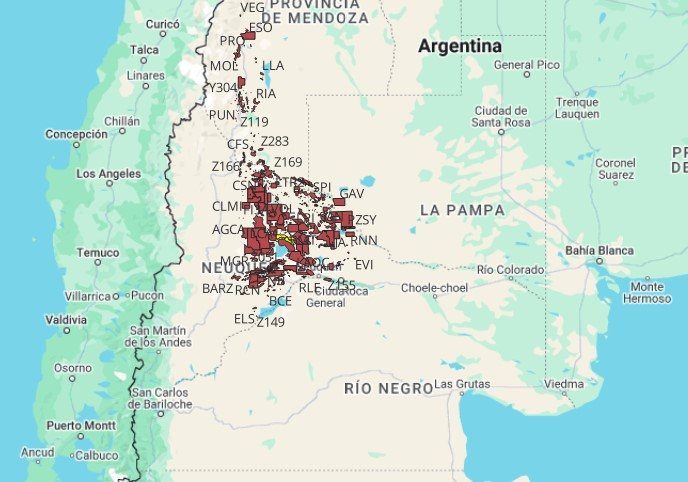

In [14]:

#Esta es la imagen satelital y el área de consesion (intentar con QGIS)
Image('img/neuquen_yac.jpg', width=600 , height=300)
#Aca lo que vemos son 3 zonas de idareadeyacimiento  LOMA CAMPANA, LOMA CAMPANA-LLL y LOMA CAMPANA-SB

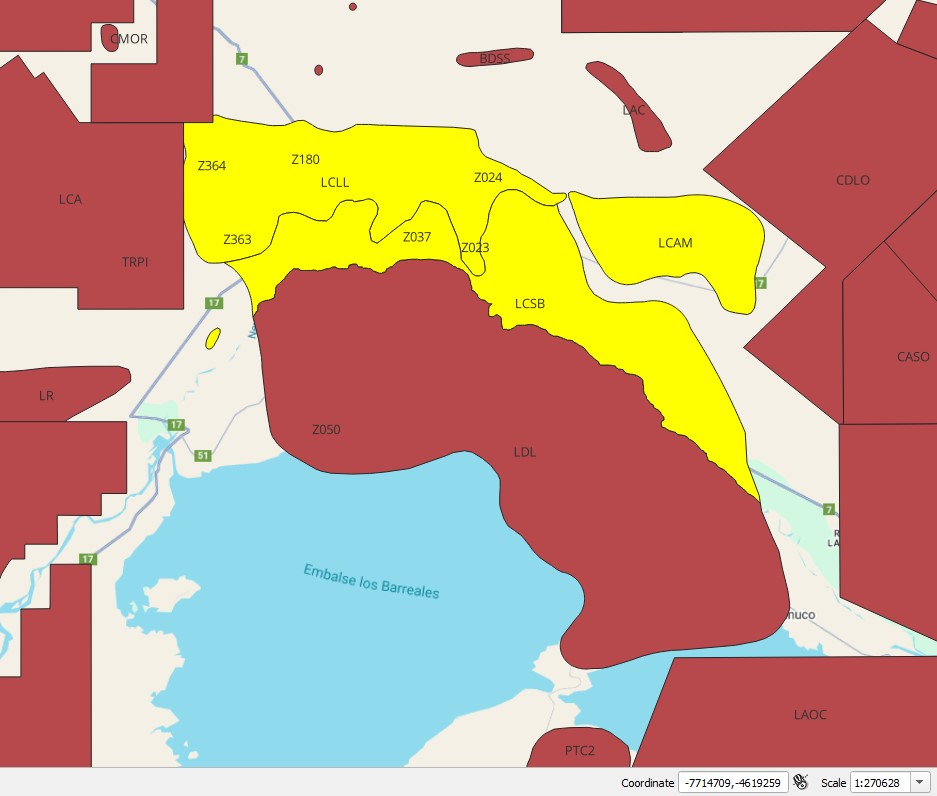

In [15]:

#Esta es la imagen satelital y el área de consesion (intentar con QGIS)
Image('img/yaci_selecc.jpg', width=600 , height=300)
#Aca lo que vemos son 3 zonas de idareadeyacimiento  LOMA CAMPANA, LOMA CAMPANA-LLL y LOMA CAMPANA-SB

  formprod  profundidad
0     CENT  2693.000000
1     QTUC  2967.200000
2     SBLA  3198.000000
3     VMUT  4282.383202


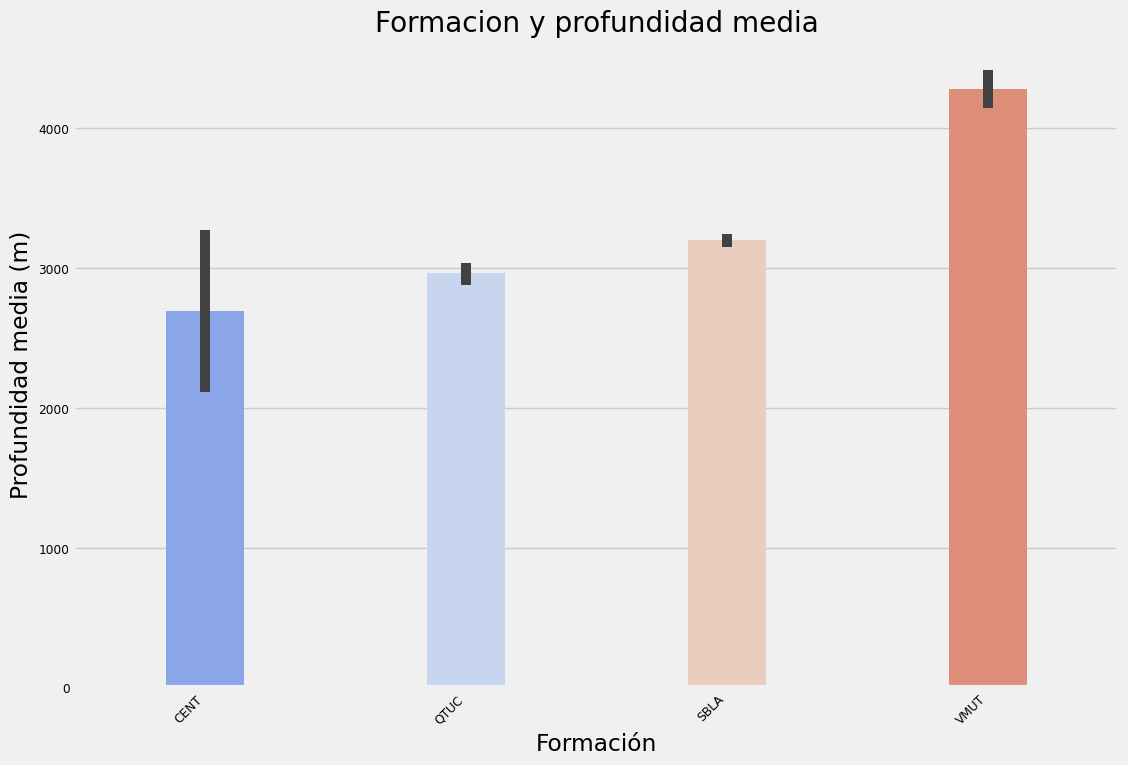

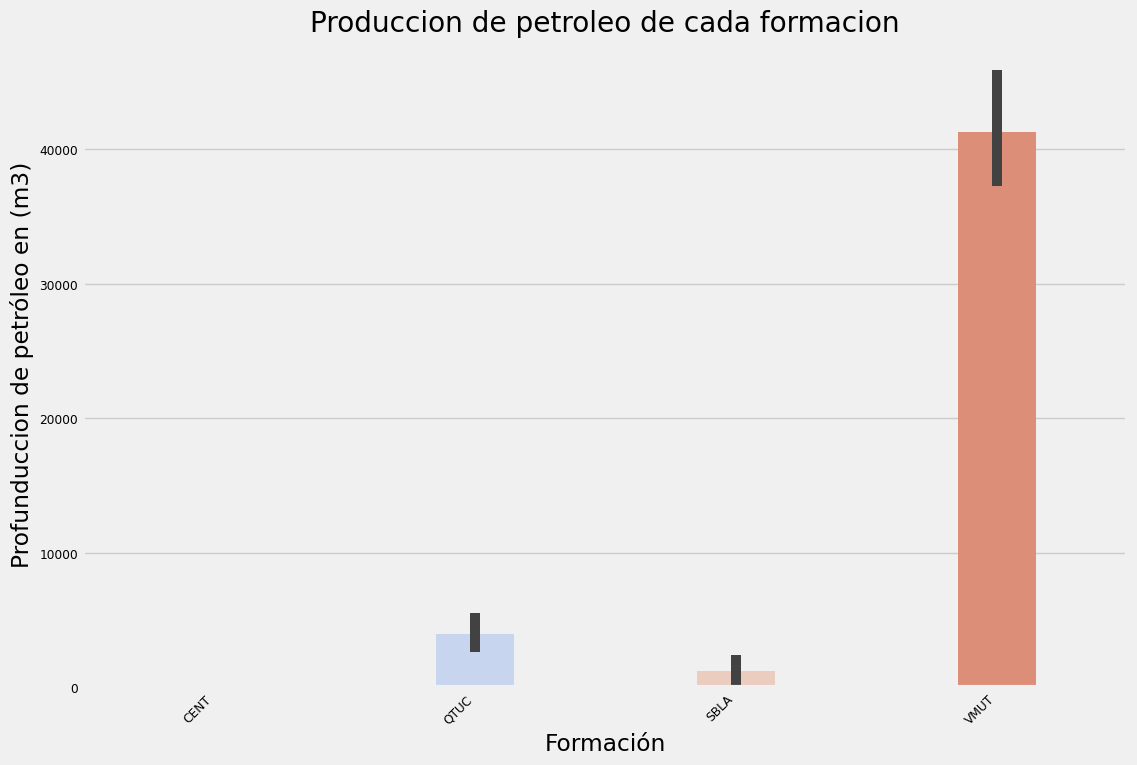

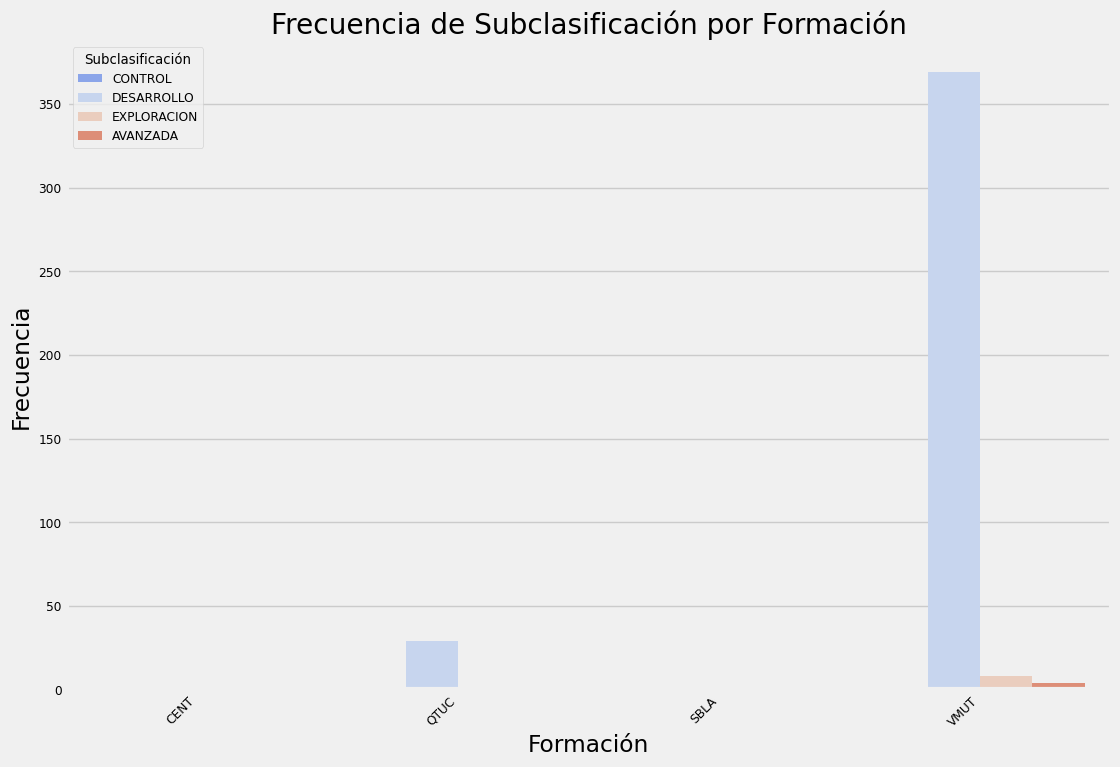

In [16]:

#formacion productiva y profundidad
LLCL_plus=LCLL.groupby(["formprod", "profundidad","subclasificacion","sub_tipo_recurso"])["prod_pet"].sum().reset_index()

profundidad_media = LLCL_plus.groupby('formprod')['profundidad'].mean().reset_index()
print(profundidad_media)


plt.figure(figsize=(12, 8))
sns.barplot(x='formprod', y='profundidad', data=LLCL_plus,width=0.3, palette='coolwarm')
plt.title('Formacion y profundidad media')
plt.xlabel('Formación')
plt.ylabel('Profundidad media (m)')
plt.xticks(rotation=45, ha='right')

plt.show()


plt.figure(figsize=(12, 8))
sns.barplot(x='formprod', y='prod_pet', data=LLCL_plus,width=0.3, palette='coolwarm')
plt.title('Produccion de petroleo de cada formacion')
plt.xlabel('Formación')
plt.ylabel('Profunduccion de petróleo en (m3)')
plt.xticks(rotation=45, ha='right')

plt.show()



# Gráfico de barras agrupadas para la frecuencia de cada subclasificación por formación
plt.figure(figsize=(12, 8))
sns.countplot(x='formprod', hue='subclasificacion', data=LLCL_plus, palette='coolwarm')
plt.title('Frecuencia de Subclasificación por Formación')
plt.xlabel('Formación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Subclasificación')

plt.show()

# We have completed the analysis of LC, and we are recollecting the time series data for Neuquen's oil production along time

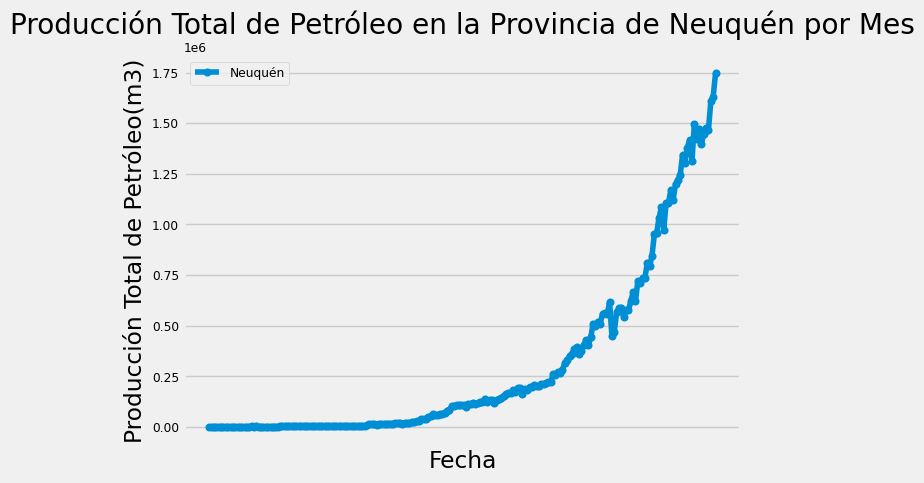

In [19]:
estadisticas_prod_pet= pozos_neuquen.groupby(['provincia','fecha'])['prod_pet'].sum()
estadisticas_prod_gas= pozos_neuquen.groupby(['provincia','fecha'])['prod_gas'].sum()
estadisticas_profundidad = pozos_neuquen.groupby(['provincia','profundidad'])['prod_pet'].sum()



# Convertir la Serie a DataFrame
df_prod_pet = estadisticas_prod_pet.reset_index(name='Produccion_Total_Petroleo')

# Graficar la producción total de petróleo por año para la provincia de Neuquén
plt.plot(df_prod_pet['fecha'], df_prod_pet['Produccion_Total_Petroleo'], marker='o', label='Neuquén')

# Personalizar el gráfico
plt.title('Producción Total de Petróleo en la Provincia de Neuquén por Mes')
plt.xlabel('Fecha')
plt.xticks([])
plt.ylabel('Producción Total de Petróleo(m3)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Comparison between the total oil production of YPF and the Neuquen Province

(array([], dtype=float64), [])

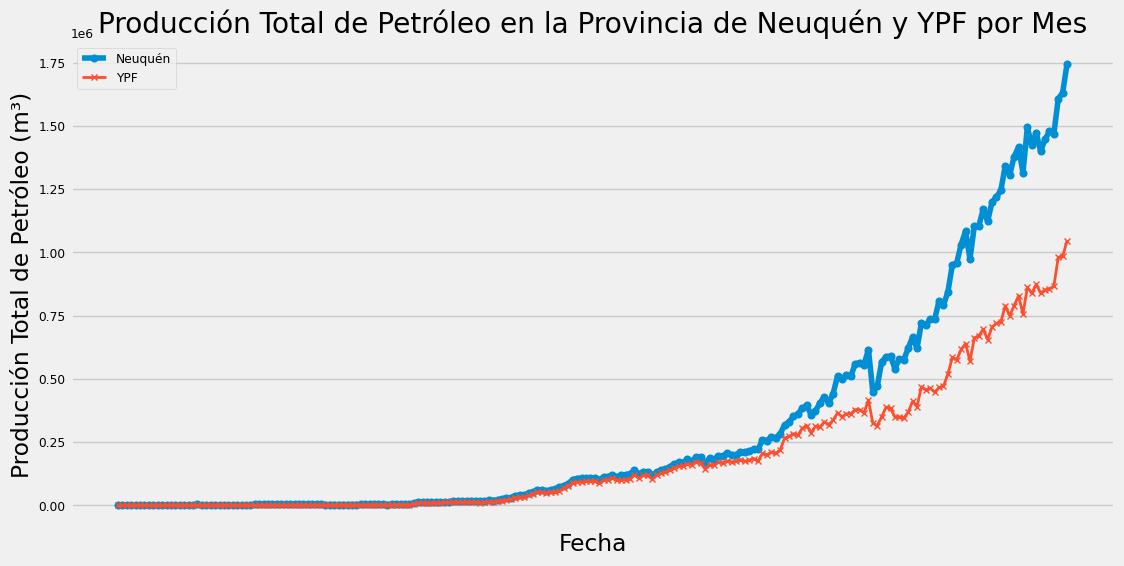

In [21]:
YPF = df.query('idempresa=="YPF" and 2010 <= anio <= 2023')
APS=df.query('idempresa=="APS" and 2010 <= anio <= 2023')
PLU=df.query('idempresa=="PLU" and 2010 <= anio <= 2023')
#print(frecuencia)


df_petroleo_por_empresa = df.groupby(['idempresa', 'fecha'])['prod_pet'].sum().reset_index()

datos_empresa_ypf = df_petroleo_por_empresa[df_petroleo_por_empresa['idempresa'] == 'YPF']

plt.figure(figsize=(12, 6))



# Graficar la producción total de petróleo para la provincia de Neuquén
plt.plot(df_prod_pet['fecha'], df_prod_pet['Produccion_Total_Petroleo'], marker='o', label='Neuquén')

# Graficar la producción de petróleo de YPF
plt.plot(datos_empresa_ypf['fecha'], datos_empresa_ypf['prod_pet'], label='YPF', marker='x', linestyle='-', linewidth=2)

# Personalizar el gráfico
plt.title('Producción Total de Petróleo en la Provincia de Neuquén y YPF por Mes')
plt.xlabel('Fecha')
plt.ylabel('Producción Total de Petróleo (m³)')
plt.legend()
plt.grid(True)
plt.xticks([])

# Rotar etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráficodf

In [25]:
df_prod_pet.to_csv('serie_tiempo_neuquen.csv', header=True)